In [1]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/recommender_system/NeuralCF/

/content/drive/MyDrive/recommender_system/NeuralCF


In [4]:
#!ls

models.py  ncf.py  neural_cf.ipynb  __pycache__  run.py  training_evolution


# Neural Collaborative Filtering (NCF)

This notebook allows users to train the wanted NCF model and predict the rating of some (user, item) pairs.

> Note: We implemented the three models proposed in this paper ([link](https://arxiv.org/pdf/1708.05031)). You are then allowed to use 'GMF', 'MLP' and 'NeuMF' models.

In [5]:
from ncf import *
import time

%load_ext autoreload
%autoreload 2

Define model parameters.

In [12]:
data_path = "../data/train.csv"
test_path = "../data/test.csv"
model_to_use = 'GMF'
val_ratio = 0.01
batch_size = 4096
embedding_dim_mlp = 3
embedding_dim_gmf = 5000
epochs = 40
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.01
weight_decay = 4e-5
plot_folder = 'training_evolution'
start = time.time()

Initiate the selected NCF model.

In [13]:
# Initiate NCF model
ncf = NCF(data_path=data_path,
          model_to_use=model_to_use,
          val_ratio=val_ratio,
          batch_size=batch_size,
          embedding_dim_gmf=embedding_dim_gmf,
          embedding_dim_mlp=embedding_dim_mlp,
          epochs=epochs,
          device=device,
          lr=lr,
          weight_decay=weight_decay,
          plot_folder=plot_folder)

Start the training phase.

Start Training Epoch 1...
		- Train: MSE loss=6.9495, RMSE=2.6362
		- Val: MSE loss=6.6434, RMSE=2.5775
		- lr=0.0099845867

Start Training Epoch 2...
		- Train: MSE loss=6.1250, RMSE=2.4749
		- Val: MSE loss=5.5746, RMSE=2.3611
		- lr=0.0099384417

Start Training Epoch 3...
		- Train: MSE loss=4.7923, RMSE=2.1891
		- Val: MSE loss=3.9913, RMSE=1.9978
		- lr=0.0098618496

Start Training Epoch 4...
		- Train: MSE loss=3.1201, RMSE=1.7664
		- Val: MSE loss=2.4055, RMSE=1.5510
		- lr=0.0097552826

Start Training Epoch 5...
		- Train: MSE loss=1.8004, RMSE=1.3418
		- Val: MSE loss=1.4686, RMSE=1.2119
		- lr=0.0096193977

Start Training Epoch 6...
		- Train: MSE loss=1.1350, RMSE=1.0653
		- Val: MSE loss=1.0702, RMSE=1.0345
		- lr=0.0094550326

Start Training Epoch 7...
		- Train: MSE loss=0.8580, RMSE=0.9263
		- Val: MSE loss=0.9051, RMSE=0.9514
		- lr=0.0092632008

Start Training Epoch 8...
		- Train: MSE loss=0.7326, RMSE=0.8559
		- Val: MSE loss=0.8269, RMSE=0.9093
		- lr=0.0090450850



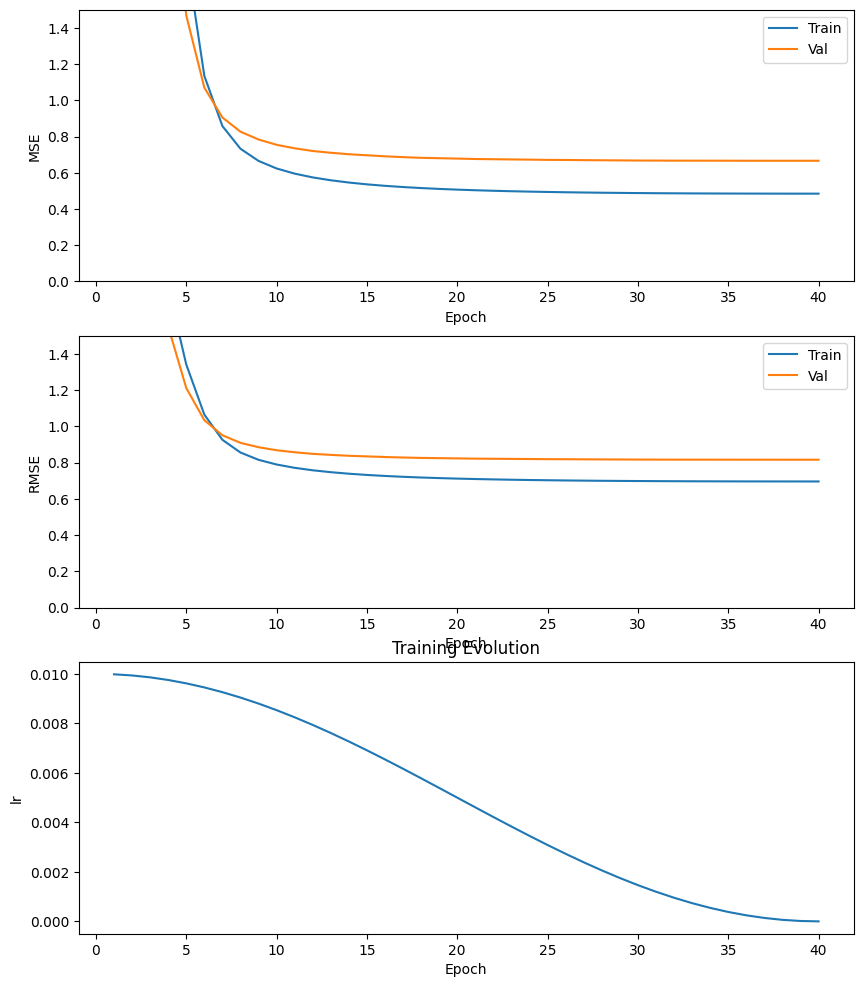

In [14]:
# Start the training
ncf.fit()

If training was successful, predict the rating of `test.csv`.

In [16]:
ncf.predict(test_path=test_path)

Pairs of (user, item) have been successfully predicted.


In [17]:
end = time.time()
elapsed_time = end - start
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Running this notebook took {minutes} min {seconds} sec!")

Running this notebook took 3 min 46 sec!
